# ABS tutorial 02

## basics of `abssep` class

In [1]:
import numpy as np
import matplotlib
import healpy as hp
import logging as log
import abspy as ap
%matplotlib inline
#log.basicConfig(filename='abspy_tutorial02.log', level=log.DEBUG)

### read in $C_ls$

- in `alms_r5.npy`, 3 frequency bands, 4 components (cmb,sync,dust,noise)

In [2]:
alms = np.load('./data/Alms_all.npy')
print (alms.shape, alms.dtype)

(3, 4, 3, 2100225) complex128


In [3]:
NSIDE = 32

cmb_map = hp.alm2map(alms[0,0,:,:],nside=NSIDE,verbose=0)

sync_map_f95 = hp.alm2map(alms[0,1,:,:],nside=NSIDE,verbose=0)
dust_map_f95 = hp.alm2map(alms[0,2,:,:],nside=NSIDE,verbose=0)
noise_map_f95 = hp.alm2map(alms[0,3,:,:],nside=NSIDE,verbose=0)

sync_map_f150 = hp.alm2map(alms[1,1,:,:],nside=NSIDE,verbose=0)
dust_map_f150 = hp.alm2map(alms[1,2,:,:],nside=NSIDE,verbose=0)
noise_map_f150 = hp.alm2map(alms[1,3,:,:],nside=NSIDE,verbose=0)

sync_map_f353 = hp.alm2map(alms[2,1,:,:],nside=NSIDE,verbose=0)
dust_map_f353 = hp.alm2map(alms[2,2,:,:],nside=NSIDE,verbose=0)
noise_map_f353 = hp.alm2map(alms[2,3,:,:],nside=NSIDE,verbose=0)

- visualize

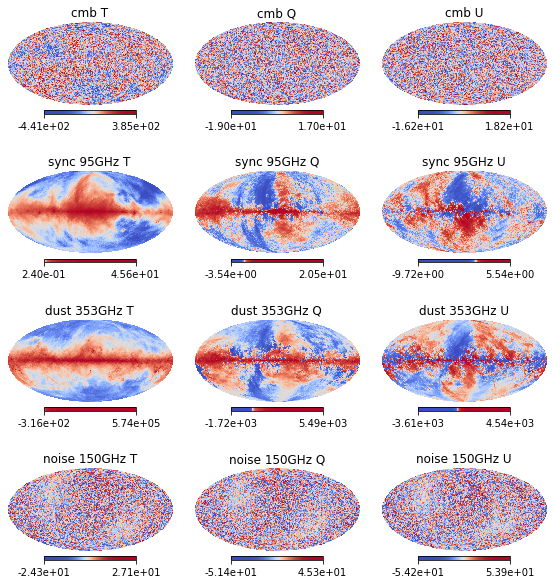

In [4]:
fig = matplotlib.pyplot.figure(figsize=(10,10))

gs = matplotlib.gridspec.GridSpec(55, 30)

fig.add_subplot(gs[0:10, 0:10])
hp.mollview(cmb_map[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='cmb T',cbar=1)
fig.add_subplot(gs[0:10, 10:20])
hp.mollview(cmb_map[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='cmb Q',cbar=1)
fig.add_subplot(gs[0:10, 20:30])
hp.mollview(cmb_map[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='cmb U',cbar=1)

fig.add_subplot(gs[15:25, 0:10])
hp.mollview(sync_map_f95[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='sync 95GHz T',cbar=1)
fig.add_subplot(gs[15:25, 10:20])
hp.mollview(sync_map_f95[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='sync 95GHz Q',cbar=1)
fig.add_subplot(gs[15:25, 20:30])
hp.mollview(sync_map_f95[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='sync 95GHz U',cbar=1)

fig.add_subplot(gs[30:40, 0:10])
hp.mollview(dust_map_f353[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='dust 353GHz T',cbar=1)
fig.add_subplot(gs[30:40, 10:20])
hp.mollview(dust_map_f353[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='dust 353GHz Q',cbar=1)
fig.add_subplot(gs[30:40, 20:30])
hp.mollview(dust_map_f353[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='dust 353GHz U',cbar=1)

fig.add_subplot(gs[45:55, 0:10])
hp.mollview(noise_map_f150[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='noise 150GHz T',cbar=1)
fig.add_subplot(gs[45:55, 10:20])
hp.mollview(noise_map_f150[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='noise 150GHz Q',cbar=1)
fig.add_subplot(gs[45:55, 20:30])
hp.mollview(noise_map_f150[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='noise 150GHz U',cbar=1)

(1e-05, 10000000.0)

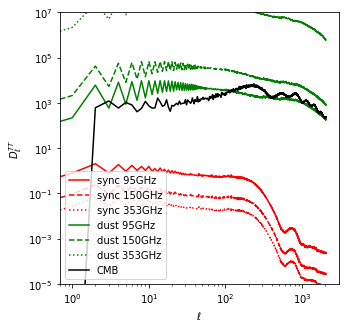

In [5]:
fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))

ellmax = len(hp.alm2cl(alms[0,1,:,:])[0])
ell = np.arange(ellmax)

ax.plot((0.5/np.pi)*ell*(ell+1)*hp.alm2cl(alms[0,1,:,:])[0],
        color='red',linestyle='-',label=r'sync 95GHz')
ax.plot((0.5/np.pi)*ell*(ell+1)*hp.alm2cl(alms[1,1,:,:])[0],
        color='red',linestyle='--',label=r'sync 150GHz')
ax.plot((0.5/np.pi)*ell*(ell+1)*hp.alm2cl(alms[2,1,:,:])[0],
        color='red',linestyle=':',label=r'sync 353GHz')

ax.plot((0.5/np.pi)*ell*(ell+1)*hp.alm2cl(alms[0,2,:,:])[0],
        color='green',linestyle='-',label=r'dust 95GHz')
ax.plot((0.5/np.pi)*ell*(ell+1)*hp.alm2cl(alms[1,2,:,:])[0],
        color='green',linestyle='--',label=r'dust 150GHz')
ax.plot((0.5/np.pi)*ell*(ell+1)*hp.alm2cl(alms[2,2,:,:])[0],
        color='green',linestyle=':',label=r'dust 353GHz')

ax.plot((0.5/np.pi)*ell*(ell+1)*hp.alm2cl(alms[0,0,:,:])[0],
        color='black',linestyle='-',label=r'CMB')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=3)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$D^{TT}_\ell$')
ax.set_ylim((1.e-5,1.e7))

In [6]:
Nfreq = 3  # 95,150,353
Nell = 1000
print ('number of frequency bands',Nfreq)
print ('number of angular modes',Nell)

number of frequency bands 3
number of angular modes 1000


### assemble $C^{TT}_\ell$s to ABSpy required shape (without noise)

- total PS, comes in shape $(N_\ell,N_\nu,N_\nu)$

In [19]:
totalPS = np.zeros((Nell+1,Nfreq,Nfreq))

# total Alms
alms_f95 = alms[0,0,:,:] + alms[0,1,:,:] + alms[0,2,:,:]
alms_f150 = alms[1,0,:,:] + alms[1,1,:,:] + alms[1,2,:,:]
alms_f353 = alms[2,0,:,:] + alms[2,1,:,:] + alms[2,2,:,:]

f95auto = hp.alm2cl(alms_f95,lmax=Nell)[0]
f150auto = hp.alm2cl(alms_f150,lmax=Nell)[0]
f353auto = hp.alm2cl(alms_f353,lmax=Nell)[0]
f95f150 = hp.alm2cl(alms_f95,alms_f150,lmax=Nell)[0]
f95f353 = hp.alm2cl(alms_f95,alms_f353,lmax=Nell)[0]
f150f353 = hp.alm2cl(alms_f150,alms_f353,lmax=Nell)[0]

for i in range(Nell+1):
    # diagnoal
    totalPS[i,0,0] = f95auto[i]
    totalPS[i,1,1] = f150auto[i]
    totalPS[i,2,2] = f353auto[i]
    # cross
    totalPS[i,0,1] = f95f150[i]
    totalPS[i,0,2] = f95f353[i]
    totalPS[i,1,2] = f150f353[i]
    totalPS[i,1,0] = totalPS[i,0,1]
    totalPS[i,2,0] = totalPS[i,0,2]
    totalPS[i,2,1] = totalPS[i,1,2]

In [20]:
totalPS[100,:,:]

array([[4.71556605e+00, 1.30790576e+01, 3.75821245e+02],
       [1.30790576e+01, 3.82360090e+01, 1.12861337e+03],
       [3.75821245e+02, 1.12861337e+03, 3.37614495e+04]])

In [21]:
totalPS[500,:,:]

array([[1.36163065e-01, 2.17174402e-01, 3.42369607e+00],
       [2.17174402e-01, 4.56333400e-01, 1.03024264e+01],
       [3.42369607e+00, 1.03024264e+01, 3.08297249e+02]])

In [22]:
totalPS[600,:,:]

array([[1.80788112e-01, 2.70668712e-01, 3.58944703e+00],
       [2.70668712e-01, 5.38315379e-01, 1.11153185e+01],
       [3.58944703e+00, 1.11153185e+01, 3.34703478e+02]])

### use the ABSpy module

In [23]:
separator = ap.abssep(totalPS,lbin=20,shift=10.,cut=1.)
result = separator()

(1e-07, 10000000.0)

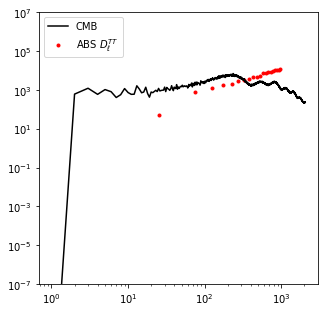

In [24]:
fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))

ax.scatter(result[0],result[1],
           color='red',marker='.',label=r'ABS $D^{TT}_\ell$')
ax.plot((0.5/np.pi)*ell*(ell+1)*hp.alm2cl(alms[0,0,:,:])[0],
        color='black',linestyle='-',label=r'CMB')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=2)
ax.set_ylim((1.e-7,1.e7))

end